#Car Sales EDA

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
df=pd.read_csv('/content/drive/MyDrive/Datasets/Car Sale.csv')
df.shape
df.info()
df.sample(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car_id         23906 non-null  object
 1   Date           23906 non-null  object
 2   Customer Name  23905 non-null  object
 3   Gender         23906 non-null  object
 4   Annual Income  23906 non-null  int64 
 5   Dealer_Name    23906 non-null  object
 6   Company        23906 non-null  object
 7   Model          23906 non-null  object
 8   Engine         23906 non-null  object
 9   Transmission   23906 non-null  object
 10  Color          23906 non-null  object
 11  Price ($)      23906 non-null  int64 
 12  Dealer_No      23906 non-null  object
 13  Body Style     23906 non-null  object
 14  Phone          23906 non-null  int64 
 15  Dealer_Region  23906 non-null  object
dtypes: int64(3), object(13)
memory usage: 2.9+ MB


,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
12342,C_CND_012343,3/29/2023,Cpoe,Male,515000,Capitol KIA,Jaguar,S-Type,Overhead Camshaft,Manual,Red,21001,38701-8047,Passenger,8085990,Aurora
2942,C_CND_002943,6/4/2022,Elizabeth,Male,13500,Hatfield Volkswagen,Dodge,Ram Pickup,Overhead Camshaft,Manual,Pale White,16000,99301-3882,Hatchback,8528735,Pasco


####1)	What is the average selling price of cars for each dealer, and how does it compare across different dealers

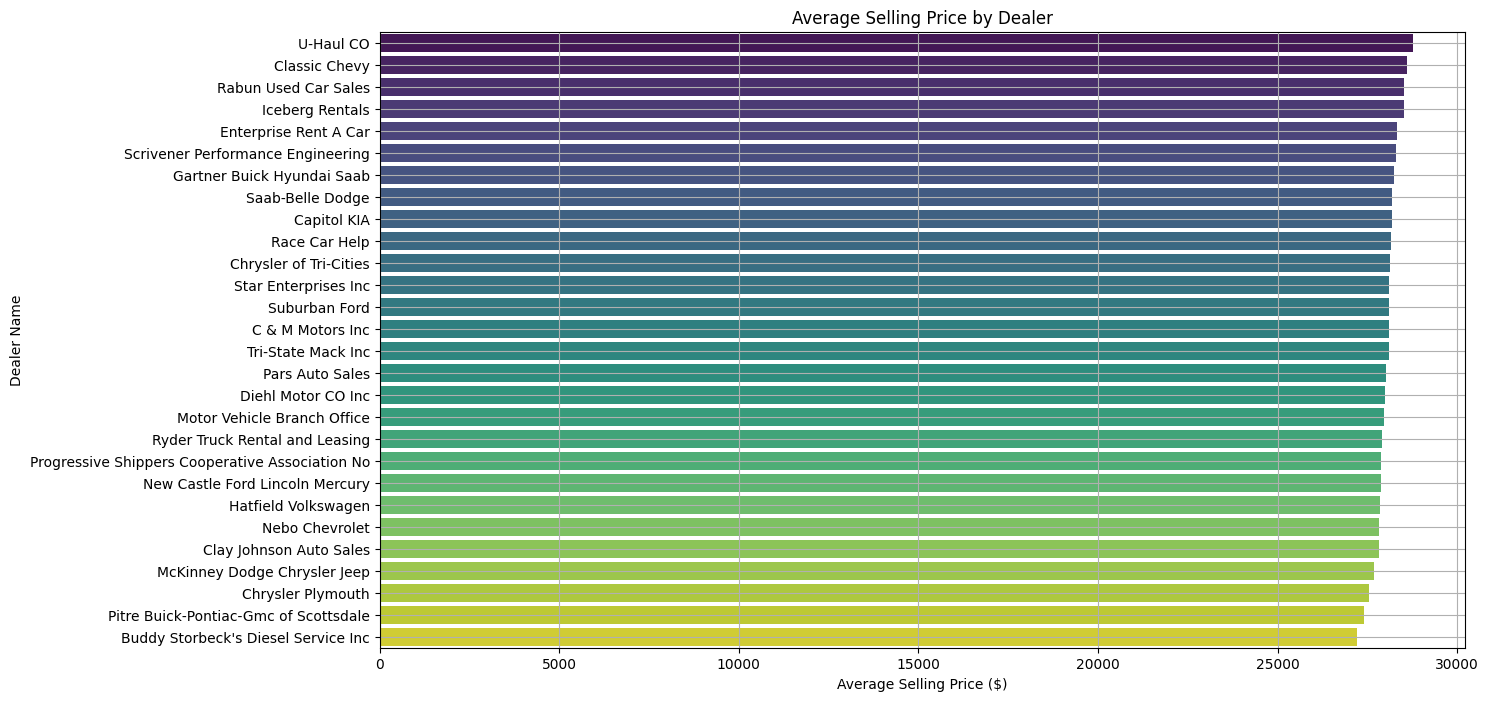

In [ ]:
#Step1: find avg selling price by grouping dealer
avg_selling_price_dealer=df.groupby('Dealer_Name')['Price ($)'].mean().reset_index()
#Step2:comparing it with other dealers
avg_selling_price_dealer = avg_selling_price_dealer.sort_values(by='Price ($)', ascending=False)
plt.figure(figsize=(14, 8))
sns.barplot(x='Price ($)', y='Dealer_Name', data=avg_selling_price_dealer, palette='viridis')
plt.title('Average Selling Price by Dealer')
plt.xlabel('Average Selling Price ($)')
plt.ylabel('Dealer Name')
plt.grid(True)
plt.show()

#####Insights>> U-Haul Co has highest average price and Buddy Storbeck's Diesel Service Inc as lowest average price .

###2)	Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing trends

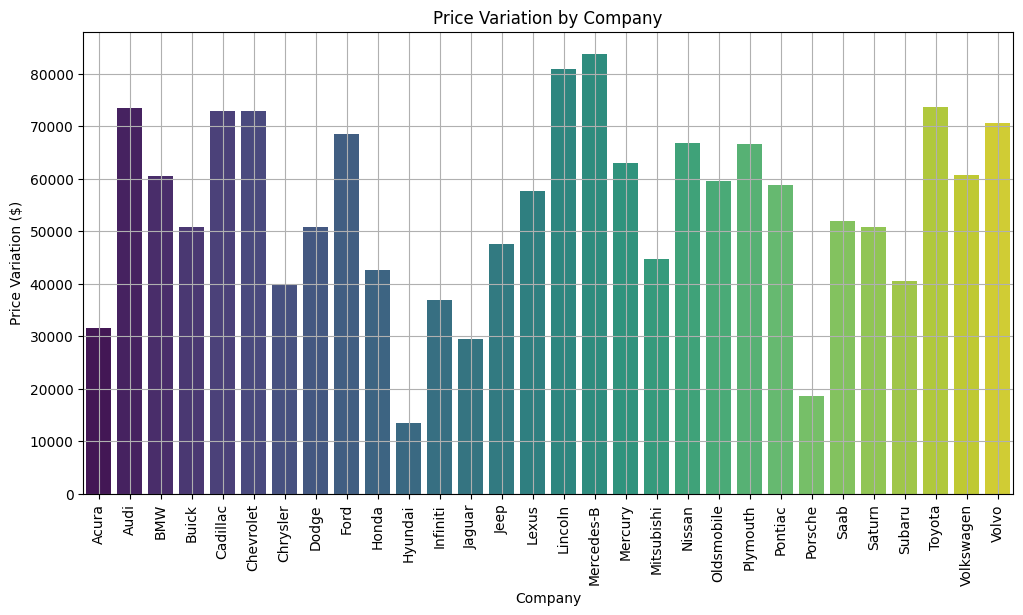

In [ ]:
#Step1: Group company and find price variation by min and max price valies
price_variation_by_company = df.groupby('Company')['Price ($)'].agg(['min', 'max']).reset_index()
price_variation_by_company['price_variation'] = price_variation_by_company['max'] - price_variation_by_company['min']
plt.figure(figsize=(12, 6))
sns.barplot(x='Company', y='price_variation', data=price_variation_by_company, palette='viridis')
plt.title('Price Variation by Company')
plt.xlabel('Company')
plt.ylabel('Price Variation ($)')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

#####Insights>> We can clearly observe that Mercedes_B has highest price variation means it produces car models with highest price variation ranges
#####Insights>> We can also see that a significant rpice variation in Lexus, Volvo, Volksvaagen, Audi and so on ...
#####Insights>>> We can observe that most of the luxury car model companies has highest price variations.

###3)	What is the distribution of car prices for each transmission type, and how do the interquartile ranges compare

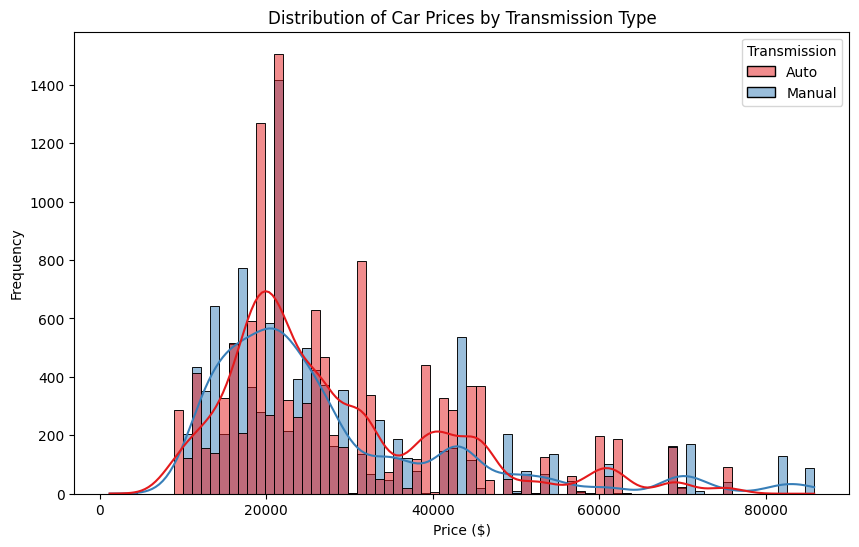

  Transmission       Q1       Q3      IQR
0         Auto  19000.0  35500.0  16500.0
1       Manual  17000.0  34000.0  17000.0


In [ ]:
#Step1:Plot a histogram or scatter plot to find the distribution of car prices for each transmission type
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='Price ($)', hue='Transmission', kde=True, palette='Set1')
plt.title('Distribution of Car Prices by Transmission Type')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.show()
transmission_group = df.groupby('Transmission')['Price ($)']
q1 = transmission_group.quantile(0.25)
q3 = transmission_group.quantile(0.75)
iqr = q3 - q1
iqr_comparison = pd.DataFrame({'Q1': q1, 'Q3': q3, 'IQR': iqr}).reset_index()
print(iqr_comparison)

#####Insights>>> We can observe that Auto Transmission has wide range of Car Prices and Manual Transmission has narrow range of price variation
#####Insights>>> By looking at the barplot we can say that Price trends/distributions are positively skewed


####4)	What is the distribution of car prices across different regions

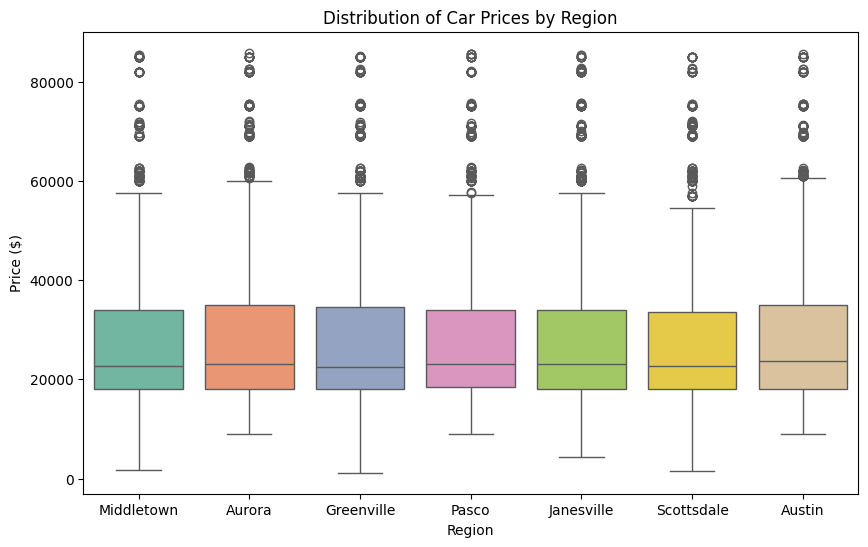

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Dealer_Region', y='Price ($)', data=df, palette='Set2')
plt.title('Distribution of Car Prices by Region')
plt.xlabel('Region')
plt.ylabel('Price ($)')
plt.show()

#####Insights>>> Austin and Aurora has wide range of prices compared to other regions.
#####Insights>>> Almost every region has outliers in price variations

####5)	What is the distribution of cars based on body styles

#####Insights>>> Most of the Car companies in USA producing SUV or Hatchback Styles when comparing to other styles and Hardtop are less produced

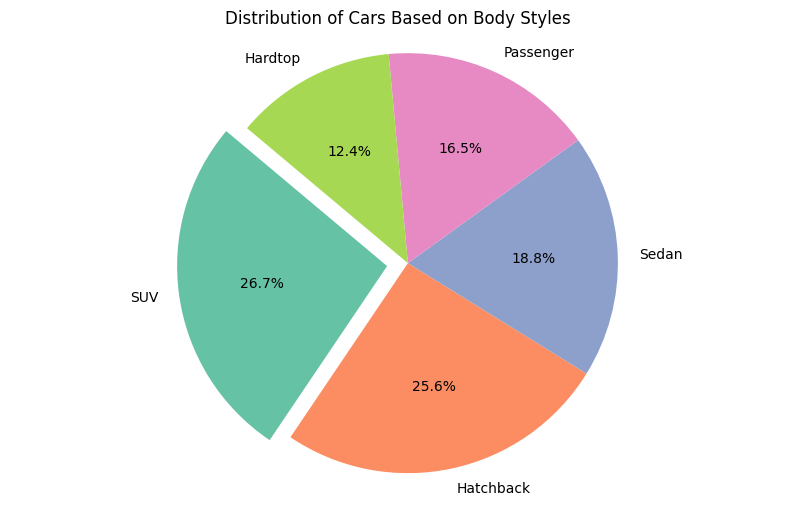

In [ ]:
body_style_counts = df['Body Style'].value_counts().reset_index()
body_style_counts.columns = ['Body Style', 'Count']
explode_values=(0.1,0,0,0,0)
plt.figure(figsize=(10, 6))
plt.pie(body_style_counts['Count'], labels=body_style_counts['Body Style'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set2', len(body_style_counts)),explode=explode_values)
plt.title('Distribution of Cars Based on Body Styles')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

####6)	How does the average selling price of cars vary by customer gender and annual income

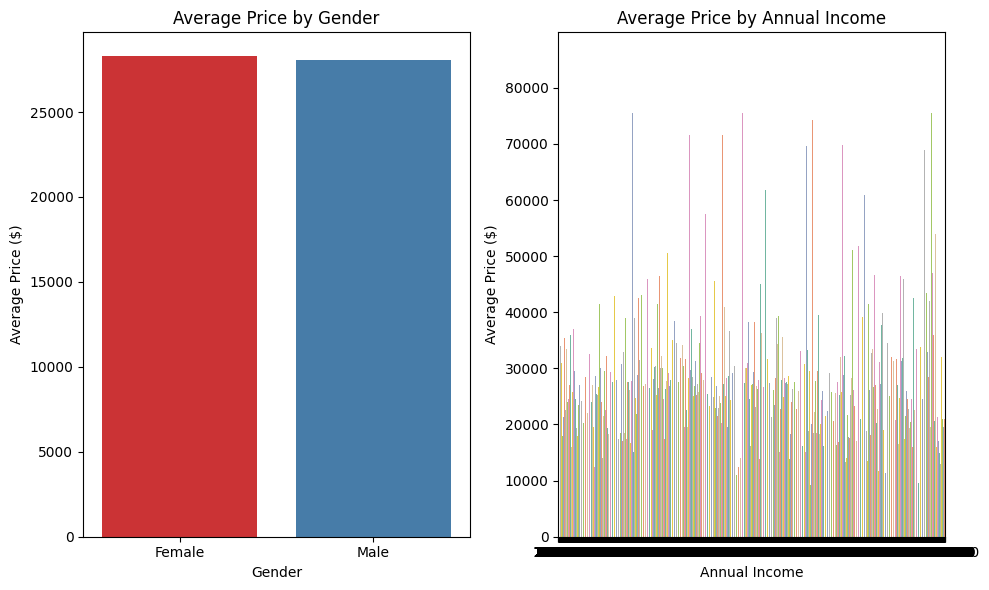

In [ ]:
avg_price_gender=df.groupby('Gender')['Price ($)'].mean().reset_index()
avg_price_income=df.groupby('Annual Income')['Price ($)'].mean().reset_index()
fig, axes = plt.subplots(1, 2, figsize=(10, 6))

# Plot average price by gender
sns.barplot(ax=axes[0], x='Gender', y='Price ($)', data=avg_price_gender, palette='Set1')
axes[0].set_title('Average Price by Gender')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Average Price ($)')

# Plot average price by annual income
sns.barplot(ax=axes[1], x='Annual Income', y='Price ($)', data=avg_price_income, palette='Set2')
axes[1].set_title('Average Price by Annual Income')
axes[1].set_xlabel('Annual Income')
axes[1].set_ylabel('Average Price ($)')
plt.tight_layout()
plt.show()

#####Insight>>>Gender not showing impact on average selling price of car but on the otherhand Annual income positive impact on Car selling price

####7)	What is the distribution of car prices by region, and how does the number of cars sold vary by region

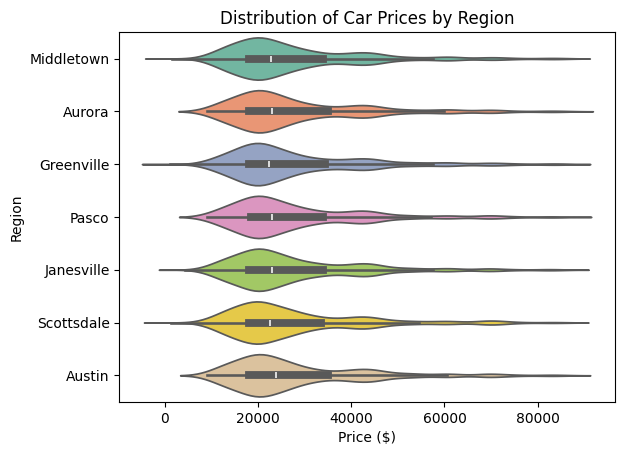

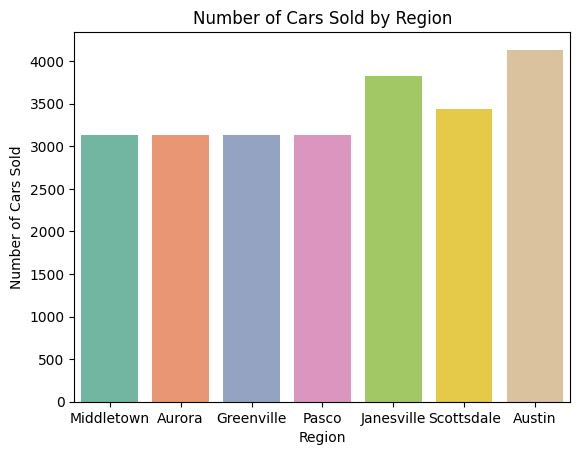

In [ ]:
sns.violinplot(x='Price ($)', y='Dealer_Region',data=df, palette='Set2')
plt.title('Distribution of Car Prices by Region')
plt.xlabel('Price ($)')
plt.ylabel('Region')
plt.show()
# Plot number of cars sold by region
sns.countplot(x='Dealer_Region', data=df, palette='Set2')
plt.title('Number of Cars Sold by Region')
plt.xlabel('Region')
plt.ylabel('Number of Cars Sold')
plt.show()

#####Insights>>>Austin Region solder highest number of Cars
#####Insights>>>Middletown and Greenville has high number of outliers

####8)	How does the average car price differ between cars with different engine sizes

In [ ]:
df.Engine.unique()

array(['DoubleÂ\xa0Overhead Camshaft', 'Overhead Camshaft'], dtype=object)

<Axes: xlabel='Engine', ylabel='Price ($)'>

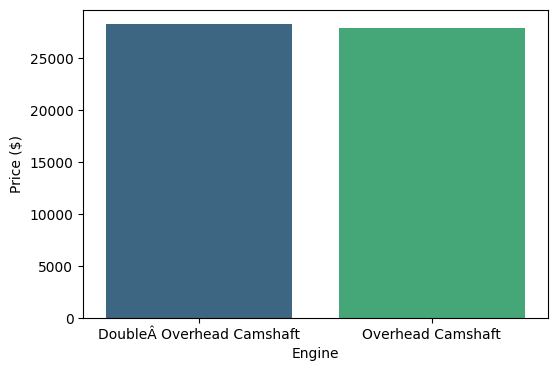

In [ ]:
avg_price_engine=df.groupby('Engine')['Price ($)'].mean().reset_index()
avg_price_engine = avg_price_engine.sort_values(by='Price ($)', ascending=False)
plt.figure(figsize=(6, 4))
sns.barplot(x='Engine', y='Price ($)', data=avg_price_engine, palette='viridis')

In [ ]:
df.sample(3)

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
20262,C_CND_020263,11/3/2023,Souhail,Male,13500,Enterprise Rent A Car,Toyota,Camry,DoubleÂ Overhead Camshaft,Auto,Pale White,31000,60504-7114,Hatchback,8621969,Austin
6142,C_CND_006143,9/22/2022,Khloe,Male,669000,Motor Vehicle Branch Office,Mercury,Sable,DoubleÂ Overhead Camshaft,Auto,Pale White,39000,78758-7841,Sedan,6269010,Austin
6208,C_CND_006209,9/24/2022,Johan,Male,2000000,New Castle Ford Lincoln Mercury,Audi,A6,DoubleÂ Overhead Camshaft,Auto,Black,27000,60504-7114,SUV,7235787,Aurora


####9)	How do car prices vary based on the customer’s annual income bracket

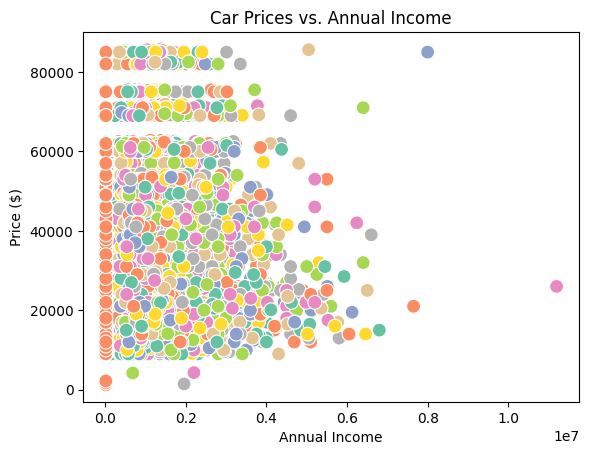

In [87]:
sns.scatterplot(x='Annual Income', y='Price ($)', data=df, hue='Annual Income', legend=False, palette='Set2', s=100)
plt.title('Car Prices vs. Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Price ($)')
plt.show()

####10)	What are the top 5 car models with the highest number of sales, and how does their price distribution look

In [89]:
df.groupby('Model')['Price ($)'].count().sort_values(ascending=False).head(5)

,Price ($)
Model,
Diamante,418
Silhouette,411
Prizm,411
Passat,391
Ram Pickup,383


#####Insights>>> Diamante Car sold highest number of unit sales

####11)	How does car price vary with engine size across different car colors, and which colors have the highest price variation

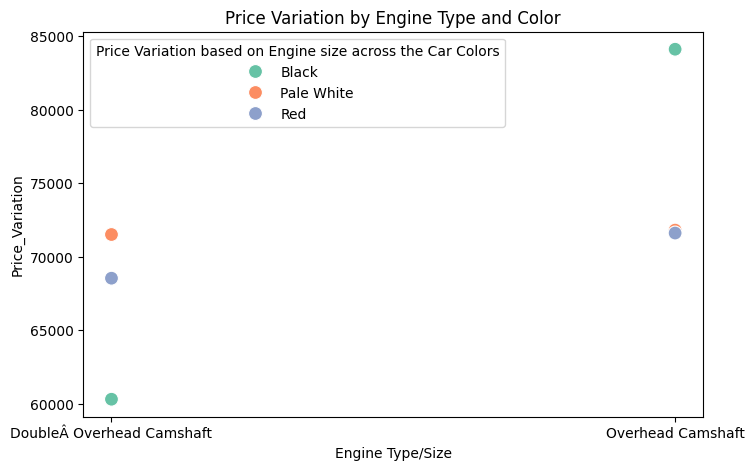

In [112]:
price_variation_by_Engine_Color = df.groupby(['Engine', 'Color'])['Price ($)'].agg(['min', 'max']).reset_index()
price_variation_by_Engine_Color['price_variation'] = price_variation_by_Engine_Color['max'] - price_variation_by_Engine_Color['min']
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Engine', y='price_variation', data=price_variation_by_Engine_Color, hue='Color', palette='Set2', s=100)
plt.title('Price Variation by Engine Type and Color')
plt.xlabel('Engine Type/Size')
plt.ylabel('Price_Variation')
plt.legend(title='Price Variation based on Engine size across the Car Colors')
plt.show()

#####Insight>>> Black color has highest variation

####12)	Is there any seasonal trend in car sales based on the date of sale

In [114]:
from datetime import date
date.today()

datetime.date(2025, 2, 21)

Monthly Sales:
    Year  Month  Number of Cars Sold
0   2022      1                  315
1   2022      2                  320
2   2022      3                  705
3   2022      4                  800
4   2022      5                  750
5   2022      6                  690
6   2022      7                  700
7   2022      8                  810
8   2022      9                 1475
9   2022     10                  835
10  2022     11                 1620
11  2022     12                 1625
12  2023      1                  475
13  2023      2                  415
14  2023      3                  830
15  2023      4                  855
16  2023      5                 1145
17  2023      6                 1025
18  2023      7                 1025
19  2023      8                  895
20  2023      9                 1830
21  2023     10                  995
22  2023     11                 1850
23  2023     12                 1921

Seasonal Sales:
   Year  Season  Number of Cars Sold
0  202

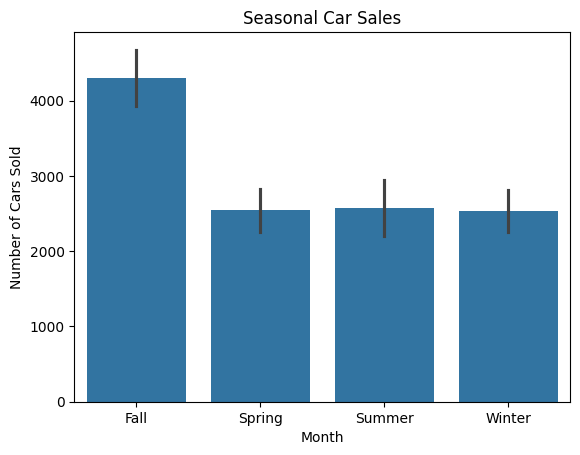

In [118]:
df['Day'] = pd.to_datetime(df['Date']).dt.day
df['Month'] = pd.to_datetime(df['Date']).dt.month
df['Year'] = pd.to_datetime(df['Date']).dt.year
df.sample(3)
seasons = {
    1: 'Winter', 2: 'Winter', 3: 'Spring',
    4: 'Spring', 5: 'Spring', 6: 'Summer',
    7: 'Summer', 8: 'Summer', 9: 'Fall',
    10: 'Fall', 11: 'Fall', 12: 'Winter'
}
# Map months to seasons
df['Season'] = df['Month'].map(seasons)

# Group by month and count car sales
monthly_sales = df.groupby(['Year', 'Month'])['Car_id'].count().reset_index()
monthly_sales.rename(columns={'Car_id': 'Number of Cars Sold'}, inplace=True)

# Group by season and count car sales
seasonal_sales = df.groupby(['Year', 'Season'])['Car_id'].count().reset_index()
seasonal_sales.rename(columns={'Car_id': 'Number of Cars Sold'}, inplace=True)

# Display results
print("Monthly Sales:")
print(monthly_sales)
print("\nSeasonal Sales:")
print(seasonal_sales)
sns.barplot(x='Season', y='Number of Cars Sold', data=seasonal_sales)
plt.title('Seasonal Car Sales Tren')
plt.xlabel('Month')
plt.ylabel('Number of Cars Sold')
plt.show()

#####Insights>>> We can Clearly see that there is a hight amount of Car Sales During Fall Season, That is between September to November months

####13)	How does the car price distribution change when considering different combinations of body style and transmission type


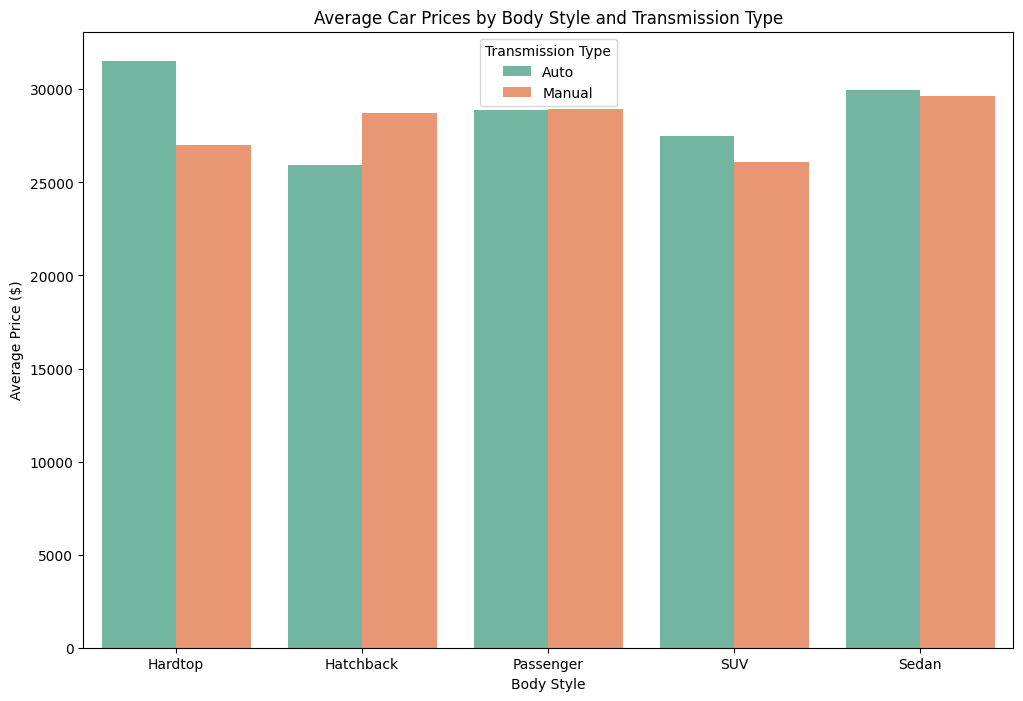

In [124]:
grouped_df = df.groupby(['Transmission', 'Body Style'])['Price ($)'].mean().reset_index()

# Create bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Body Style', y='Price ($)', hue='Transmission', data=grouped_df, palette='Set2')
plt.title('Average Car Prices by Body Style and Transmission Type')
plt.xlabel('Body Style')
plt.ylabel('Average Price ($)')
plt.legend(title='Transmission Type')
plt.show()

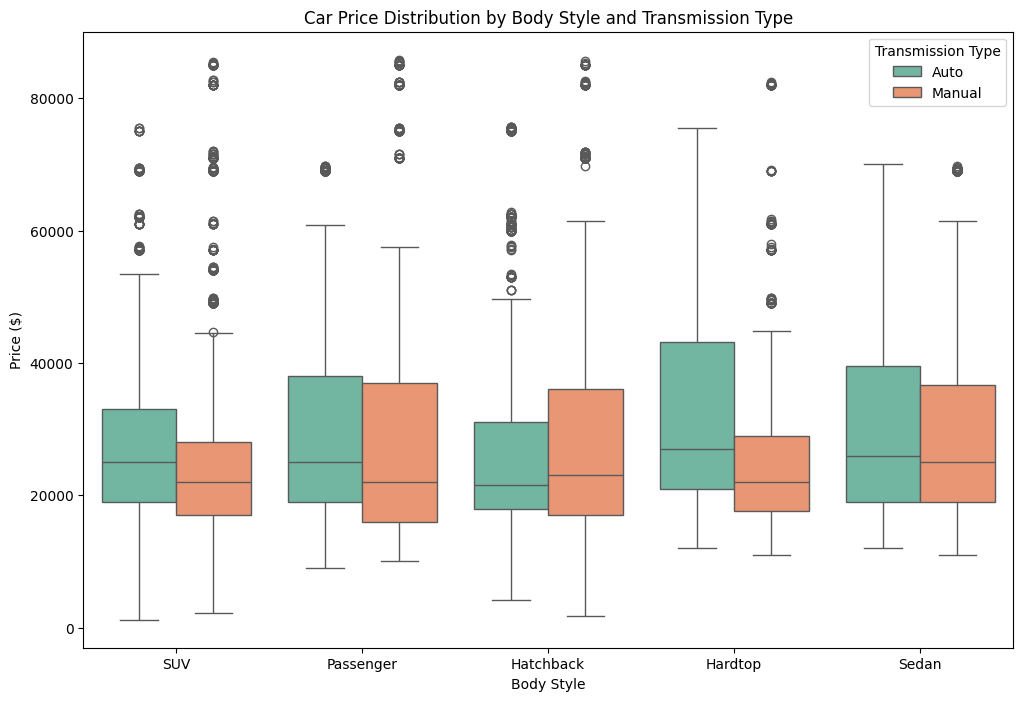

In [126]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Body Style', y='Price ($)', hue='Transmission', data=df, palette='Set2')
plt.title('Car Price Distribution by Body Style and Transmission Type')
plt.xlabel('Body Style')
plt.ylabel('Price ($)')
plt.legend(title='Transmission Type')
plt.show()

####14)	What is the correlation between car price, engine size, and annual income of customers, and how do these features interact?

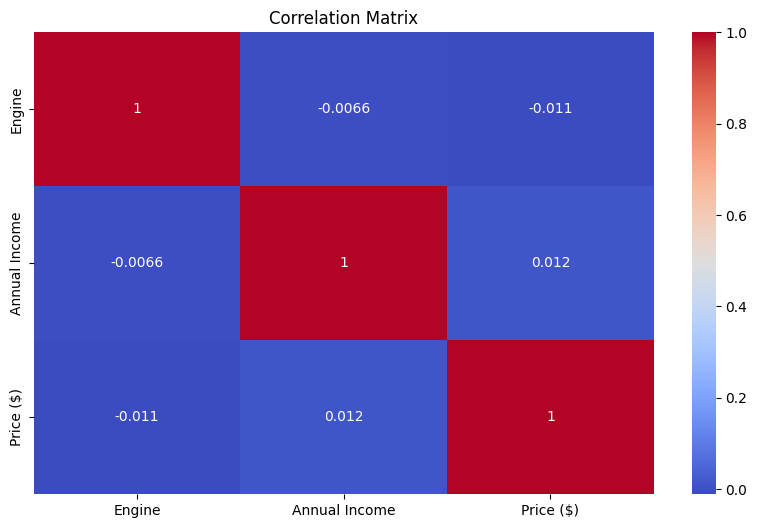

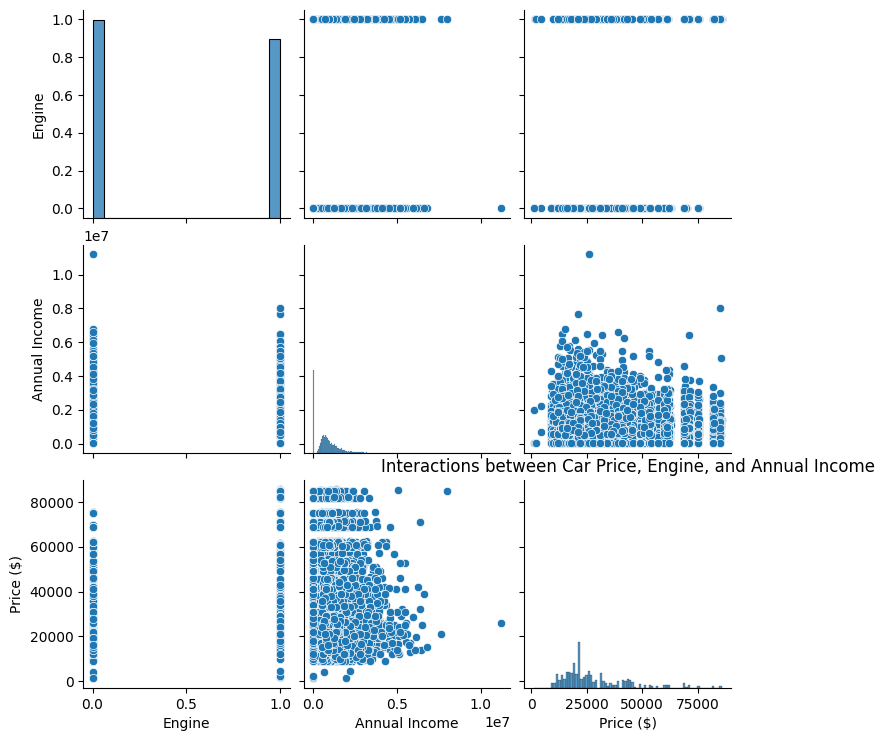

In [129]:
selected_columns = ['Engine', 'Annual Income', 'Price ($)']
df_selected = df[selected_columns]
# Convert 'Engine' to categorical type and then to numerical codes
df_selected['Engine'] = df_selected['Engine'].astype('category').cat.codes
# Calculate the correlation matrix
corr_matrix = df_selected.corr()
# Visualize the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
sns.pairplot(df_selected)
plt.title('Interactions between Car Price, Engine, and Annual Income')
plt.show()

####15)How does the average car price vary across different car models and engine types?

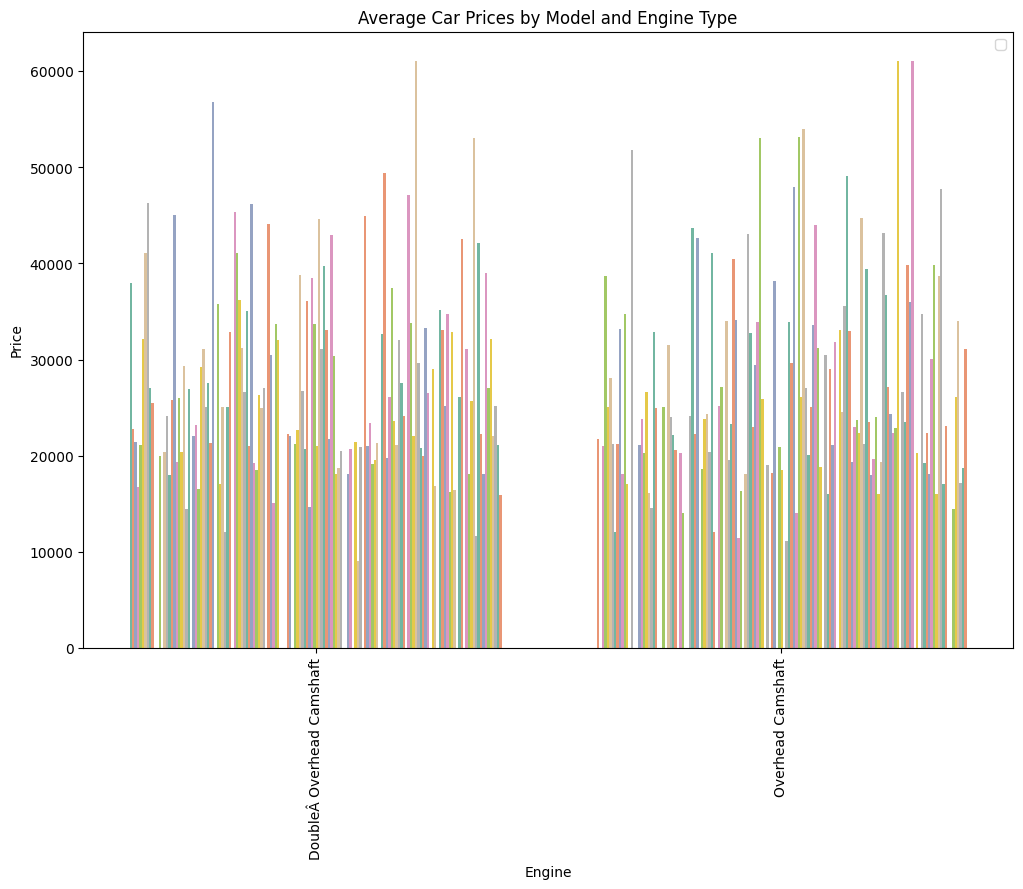

In [133]:
grouped_df = df.groupby(['Model', 'Engine'])['Price ($)'].mean().reset_index()

# Create bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Engine', y='Price ($)', hue='Model', legend=False, data=grouped_df, palette='Set2')
plt.title('Average Car Prices by Model and Engine Type')
plt.xlabel('Engine')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.legend()
plt.show()

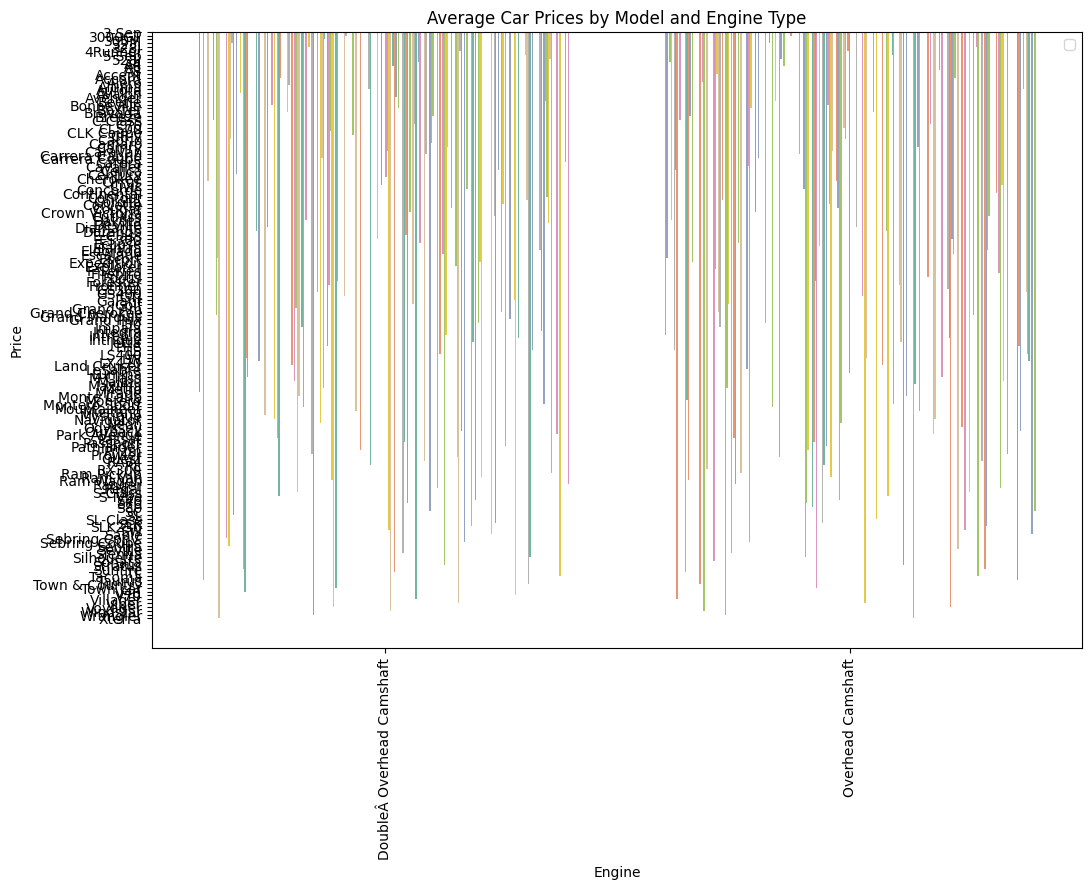

In [134]:
grouped_df = df.groupby(['Model', 'Engine'])['Price ($)'].mean().reset_index()

# Create bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Engine', y='Model', hue='Price ($)', legend=False, data=grouped_df, palette='Set2')
plt.title('Average Car Prices by Model and Engine Type')
plt.xlabel('Engine')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [139]:
total_distinct_models = df['Model'].nunique()
print("Total number of distinct models:", total_distinct_models)

Total number of distinct models: 154
